# Simple Humpback Whale CNN

In this notebook we will be collecting, cleaning, and preprocessing data related to some humpback whale flukes in order to build and train a model to classify the whales!

\#TODO: Data cleaning, data augmentation, transitioning model to an image generator with class weights.

\#TODO ADVANCED: Adding a bounding box CNN structure for greater accuracy. Potentially adding/converting to a Siamese Network.

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image, clear_output
import random
import tensorflow as tf

In [2]:
root_path = 'data/'
train_path = root_path + 'train/'
test_path = root_path + 'test/'

In [3]:
training_data = pd.read_csv(root_path + 'train.csv')   

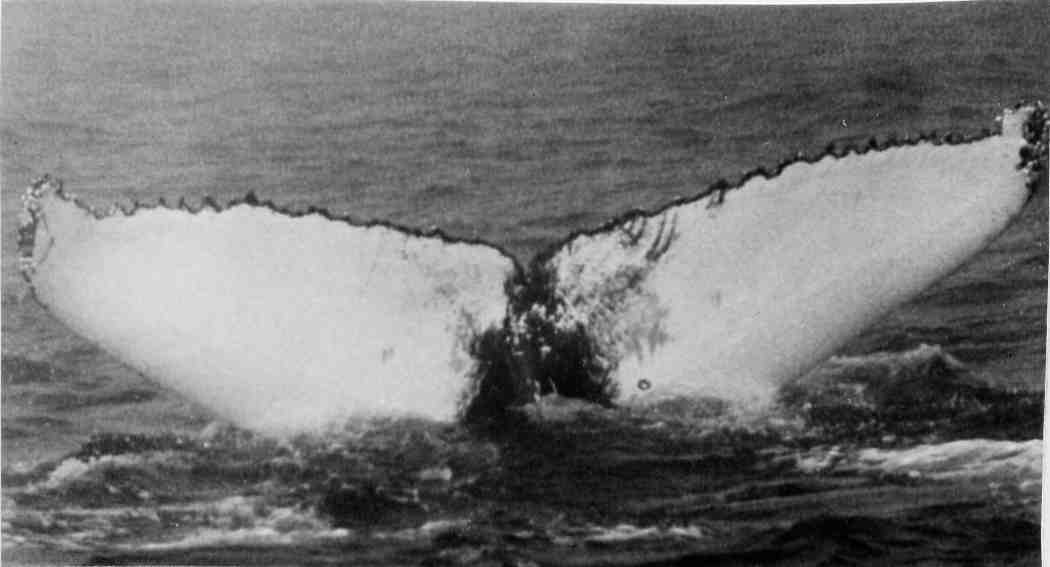

In [4]:
random_image = train_path + random.choice(training_data['Image'])
Image(random_image)

## Data Processing:

Create helper functions to modify the training data to a usable format for training. Reshape/convert to an array and normalize the values between 0 and 1.

Create a helper function for one hot encoding the labels as well as decoding for submission.

In [5]:
from tensorflow.keras.preprocessing import image

def convert_to_array(image_path):
    img = image.load_img(image_path, target_size=(100, 100, 3))
    img = np.asarray(img)
    img = img / 255
    return img

def prepare_image_data(data, image_path, m):
    prepared_data = np.zeros((m, 100, 100, 3))
    for i, image_name in enumerate(data['Image']):
        img = convert_to_array(image_path+image_name)
        prepared_data[i] = img
        if i % 1000 == 0:
            print(f"We're on the {i}th image!")
    return prepared_data

In [6]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
def prepare_labels(data):
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(data['Id'])
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded, label_encoder

## Model Building and Training

We use a multi-layer CNN to take advantage of multiple drop-out and normalization layers to try and prevent as much overfitting as is possible with such an unbalanced dataset.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization, Activation, AveragePooling2D

model = Sequential()
model.add(Conv2D(32, (7, 7), strides = (1, 1), input_shape = (100, 100, 3)))

model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), strides = (1, 1)))
model.add(Activation('relu'))
model.add(AveragePooling2D((3, 3)))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4251, activation='softmax', name='sm'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Data Loading

Time to load our data as well as our labels (and encoder, for decoding later)

In [9]:
X_data = prepare_image_data(training_data, train_path, training_data.shape[0])
clear_output()

We're on the 0th image!
We're on the 1000th image!
We're on the 2000th image!
We're on the 3000th image!


In [ ]:
y = training_data['Id']

y_train, label_encoder = prepare_labels(training_data)

## Training the Model

Here we set hyperparameters and start training our model! I've went with a large batch size due to the size of the training dataset.

In [ ]:
EPOCHS = 200
BATCH_SIZE = 64

In [ ]:
history = model.fit(X_data, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
clear_output()

Epoch 1/200
154/154 [==============================] - 2s 9ms/step - loss: 8.1079 - accuracy: 0.0813
Epoch 2/200
154/154 [==============================] - 1s 9ms/step - loss: 7.7655 - accuracy: 0.0822
Epoch 3/200
154/154 [==============================] - 1s 9ms/step - loss: 7.5321 - accuracy: 0.0822
Epoch 4/200
154/154 [==============================] - 1s 9ms/step - loss: 7.2109 - accuracy: 0.0822
Epoch 5/200
154/154 [==============================] - 1s 9ms/step - loss: 6.7746 - accuracy: 0.0831
Epoch 6/200
154/154 [==============================] - 1s 9ms/step - loss: 6.0882 - accuracy: 0.1003
Epoch 7/200
154/154 [==============================] - 1s 9ms/step - loss: 5.1811 - accuracy: 0.1522
Epoch 8/200
154/154 [==============================] - 1s 9ms/step - loss: 4.1880 - accuracy: 0.2373
Epoch 9/200
154/154 [==============================] - 1s 9ms/step - loss: 3.2120 - accuracy: 0.3552
Epoch 10/200
154/154 [==============================] - 1s 9ms/step - loss: 2.3562 - accura

Now that we have the model's history, we can plot the accuracy over the epochs and find that the model seemed to level out around the 60 epoch mark!

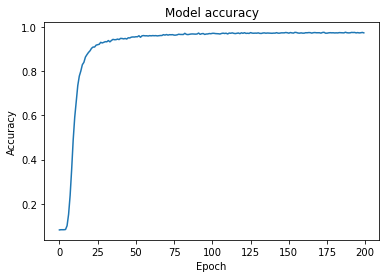

In [ ]:
import matplotlib.pyplot as plt
#plot how the accuracy changes as the model was trained
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Make Predictions and Create the Output .csv

From here it's fairly straightforward: Import the test data, convert it to a usable form using the same process as before, run predictions and export those predictions to a .csv file for submission. 

\#TODO:
Outputting the data is a more complex task than I originally considered due to needing to convert back to the original labels, and I'm certain there is a more effecient way to do it. 

In [ ]:
import os
test_data = os.listdir(test_path)
len(test_data)

15610

In [ ]:
test_data = pd.DataFrame(test_data, columns=['Image'])

In [ ]:
X_test = prepare_image_data(test_data, test_path, test_data.shape[0])
clear_output()

In [ ]:
predictions  = model.predict(X_test)

In [ ]:
copy_pred = np.copy(predictions)
idx = np.argmax(copy_pred, axis=1)
copy_pred[:,idx] = 0
idx2 = np.argmax(copy_pred, axis=1)
copy_pred[:, idx2] = 0
idx3 = np.argmax(copy_pred, axis=1)
copy_pred[:, idx3] = 0
idx4 = np.argmax(copy_pred, axis=1)
copy_pred[:, idx4] = 0
idx5 = np.argmax(copy_pred, axis=1)

In [ ]:
from numpy import argmax

results = []

threshold = 0.05 #threshold - only consider answers with a probability higher than it
for i in range(0, predictions.shape[0]):
#for i in range(0, 10):
    each = np.zeros((4251, 1))
    each2 = np.zeros((4251, 1))
    each3 = np.zeros((4251, 1))
    each4 = np.zeros((4251, 1))
    each5 = np.zeros((4251, 1))
    if((predictions[i, idx5[i]] > threshold)):
        each5[idx5[i]] = 1
        each4[idx4[i]] = 1
        each3[idx3[i]] = 1
        each2[idx2[i]] = 1
        each[idx[i]] = 1
        tags = [label_encoder.inverse_transform([argmax(each)])[0], label_encoder.inverse_transform([argmax(each2)])[0], label_encoder.inverse_transform([argmax(each3)])[0], label_encoder.inverse_transform([argmax(each4)])[0], label_encoder.inverse_transform([argmax(each5)])[0]]
    else:
        if((predictions[i, idx4[i]] > threshold)):
            print(predictions[i, idx4[i]])
            each4[idx4[i]] = 1
            each3[idx3[i]] = 1
            each2[idx2[i]] = 1
            each[idx[i]] = 1
            tags = [label_encoder.inverse_transform([argmax(each)])[0], label_encoder.inverse_transform([argmax(each2)])[0], label_encoder.inverse_transform([argmax(each3)])[0], label_encoder.inverse_transform([argmax(each4)])[0]]
        else:
            if((predictions[i, idx3[i]] > threshold)):
                each3[idx3[i]] = 1
                each2[idx2[i]] = 1
                each[idx[i]] = 1
                tags = [label_encoder.inverse_transform([argmax(each)])[0], label_encoder.inverse_transform([argmax(each2)])[0], label_encoder.inverse_transform([argmax(each3)])[0]]
            else:
                if((predictions[i, idx2[i]] > threshold)):
                    each2[idx2[i]] = 1
                    each[idx[i]] = 1
                    tags = [label_encoder.inverse_transform([argmax(each)])[0], label_encoder.inverse_transform([argmax(each2)])[0]]
                else:
                    each[idx[i]] = 1
                    tags = label_encoder.inverse_transform([argmax(each)])[0]
    results.append(tags)

In [ ]:
import csv

myfile = open('output.csv','w')

column= ['Image', 'Id']

wrtr = csv.writer(myfile, delimiter=',')
wrtr.writerow(column)

for i in range(0, test_data.shape[0]):
    pred = ""
    if(len(results[i])==5):
        if (results[i][4]!=results[i][0]):
            pred = results[i][0] + " " + results[i][1] + " " + results[i][2] + " " + results[i][3] + " " + results[i][4]
        else:
            pred = results[i][0] + " " + results[i][1] + " " + results[i][2] + " " + results[i][3]
    else:
        if(len(results[i])==4):
            pred = results[i][0] + " " + results[i][1] + " " + results[i][2] + " " + results[i][3]
        else:
            if(len(results[i])==3):
                pred = results[i][0] + " " + results[i][1] + " " + results[i][2]
            else:
                if(len(results[i])==2):
                    pred = results[i][0] + " " + results[i][1]
                else:
                    pred = results[i]
            
    result = [test_data['Image'][i], pred]
    #print(result)
    wrtr.writerow(result)
    
myfile.close()